In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Car Crash Data from January 2015 to January 2025 in Raleigh, North Carolina

Source: https://data.raleighnc.gov/datasets/ral::reported-crash-locations/explore

### Objectives: 

1) Analyze conditions that influence car crashes and fatality rate (location, weather, date/time, etc.)

2) Identify key areas at high risk of car crashes (including Geo-Spatial data analysis)

3) Predict total car crashes and fatalities in Raleigh in 2025

4) Clean and prepare the dataset for Power BI dashboard creation

### Read the Reported_Crash_Locations.csv from files and load into a pandas dataframe for analysis

In [48]:
crash_df = pd.read_csv("Reported_Crash_Locations.csv")



C:\Users\chase\AppData\Local\Temp\ipykernel_19124\987716969.py:1: DtypeWarning: Columns (6,20,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_df = pd.read_csv("Reported_Crash_Locations.csv")


### Car Crash Zone Governed by the Raleigh, NC Police Department

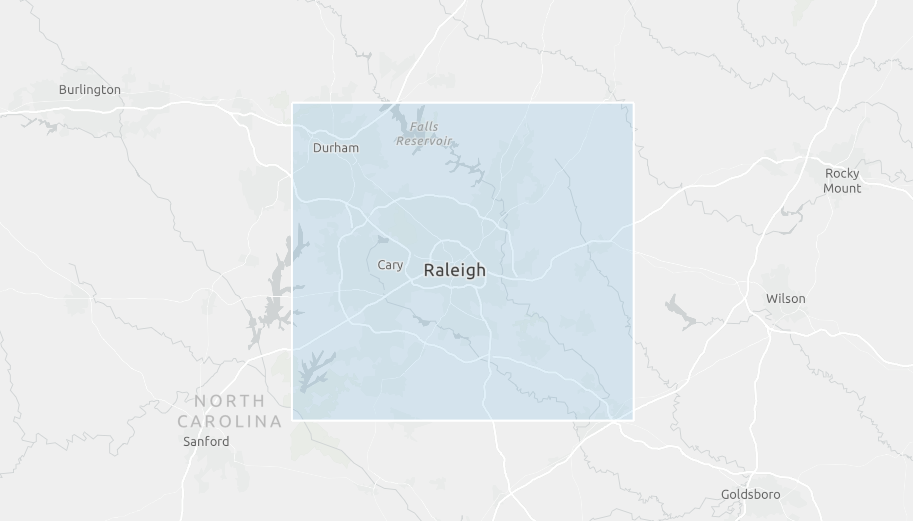

In [49]:
from IPython.display import Image, display

image_path = "Raleigh_Crash_Map.png"
display(Image(filename=image_path))

### Initial Inspection:
1) Preview the data
2) Understand data structure and data types
3) Check for missing data or unnecessary features

In [ ]:
pd.set_option('display.max_columns', 50) ## Show all columns in the df
#crash_df.head(5)
crash_df.tail(5) ## Most recent crash occurred in January 2025

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationRoadNameOn,LocationRampIndicator,LocationFeetFromRoad,LocationMilesFromRoad,LocationDirectionFromRoad,LocationAtFromIndicator,LocationRoadNameAt,LocationDirectionToRoad,LocationRoadNameTo,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,UpdateDate,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude
233036,-8.750133e+06,4.278650e+06,234945,357742,2025/01/23 07:00:00+00,P25004209,NaN,In,RALEIGH,2100 HARROD ST,No,72.0,NaN,S,From,HARROD ST,S,NEW HOPE CHURCH RD,Backing up,Backing up,NaN,NaN,NaN,NaN,NaN,NaN,2025/01/24 11:50:00.860+00,23,Thursday,5,7,January,1,2025,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.840160,-78.60378
233037,-8.760494e+06,4.268641e+06,234949,357745,2025/01/24 08:22:00+00,P25004315,NaN,In,RALEIGH,3289 AVENT FERRY RD,No,400.0,NaN,NE,From,GREEK WY,NE,GORMAN ST,Backing up,Backing up,NaN,NaN,NaN,NaN,NaN,NaN,2025/01/24 11:50:00.233+00,24,Friday,6,8,January,1,2025,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.767238,-78.69686
233038,-8.748063e+06,4.272118e+06,234950,357747,2025/01/24 08:35:00+00,P25004314,NaN,In,RALEIGH,NEW BERN AVE,No,1050.0,NaN,S,From,YONKERS RD,S,MILBURNE RD,"Rear end, slow or stop","Rear end, slow or stop",NaN,NaN,NaN,NaN,NaN,NaN,2025/01/24 11:50:00.790+00,24,Friday,6,8,January,1,2025,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.792577,-78.58519
233039,-8.747263e+06,4.283160e+06,234980,357754,2025/01/21 14:44:00+00,P24003839,NaN,In,RALEIGH,CAPITAL BLVD,No,290.0,NaN,S,From,540,S,OLD WAKE FOREST RD,"Rear end, slow or stop","Rear end, slow or stop",NaN,NaN,NaN,NaN,NaN,NaN,2025/01/24 17:09:59.760+00,21,Tuesday,3,14,January,1,2025,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35.873000,-78.57800
233040,-8.745743e+06,4.293089e+06,234983,357757,2025/01/24 13:47:00+00,P25004372,NaN,In,RALEIGH,WAKEFIELD PINES DR,No,0.0,NaN,NaN,At,KELWAY DR,E,FALLS OF NEUSE RD,"Left turn, same roadway","Left turn, same roadway",NaN,NaN,NaN,NaN,NaN,NaN,2025/01/24 17:09:59.790+00,24,Friday,6,13,January,1,2025,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,35.945239,-78.56435


### Inspect the dataframe with the shape, info, and dtypes functions

In [51]:
crash_df.shape ## 233041 rows and 48 columns 
crash_df.info 
crash_df.dtypes

X                            float64
Y                            float64
OBJECTID                       int64
key_crash                      int64
DateOfCrash                   object
LocalUse                      object
LocationRelationToRoad        object
LocationInNearIndicator       object
LocationCity                  object
LocationRoadNameOn            object
LocationRampIndicator         object
LocationFeetFromRoad         float64
LocationMilesFromRoad        float64
LocationDirectionFromRoad     object
LocationAtFromIndicator       object
LocationRoadNameAt            object
LocationDirectionToRoad       object
LocationRoadNameTo            object
FirstHarmfulEvent             object
MostHarmfulEvent              object
RoadClassification            object
RoadFeature                   object
TrafficControlType            object
WeatherCondition1             object
WeatherCondition2             object
WeatherContributedToCrash     object
UpdateDate                    object
C

### Identify missing data in each column using .isnull().sum()

In [52]:
crash_df.isnull().sum()
#crash_df.duplicated().sum() This output was "0" --> No duplicated data

X                              1690
Y                              1690
OBJECTID                          0
key_crash                         0
DateOfCrash                       1
LocalUse                          1
LocationRelationToRoad         7293
LocationInNearIndicator           1
LocationCity                      1
LocationRoadNameOn                1
LocationRampIndicator             1
LocationFeetFromRoad          19100
LocationMilesFromRoad        214664
LocationDirectionFromRoad     44559
LocationAtFromIndicator         723
LocationRoadNameAt              724
LocationDirectionToRoad        6452
LocationRoadNameTo             6562
FirstHarmfulEvent               380
MostHarmfulEvent                235
RoadClassification             8308
RoadFeature                    7886
TrafficControlType            11162
WeatherCondition1              7293
WeatherCondition2            226834
WeatherContributedToCrash      7293
UpdateDate                        1
Crash_Date_Day              

### Before cleaning the data, lets filter to only include columns that are necessary for the analysis

In [53]:
columns = crash_df.columns

In [54]:
important_cols = ['DateOfCrash','LocationCity',
       'LocationRoadNameOn','FirstHarmfulEvent',
       'MostHarmfulEvent', 'RoadClassification', 'RoadFeature',
       'TrafficControlType', 'WeatherCondition1', 'WeatherCondition2',
       'WeatherContributedToCrash', 'Crash_Date_Day',
       'Crash_Date_DOW', 'Crash_Date_DOW_Num', 'Crash_Date_Hour',
       'Crash_Date_Month', 'Crash_Date_Month_Num', 'Crash_Date_Year',
       'drivers', 'passengers', 'pedestrians', 'pedalcyclists',
       'killed','type_a_injury',
       'type_b_injury', 'type_c_injury', 'no_injury', 'injury_unknown','LocationLatitude','LocationLongitude']

In [55]:
crash_df_subset = crash_df[important_cols]
crash_df_subset.head()

,DateOfCrash,LocationCity,LocationRoadNameOn,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,drivers,passengers,pedestrians,pedalcyclists,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude
0,2015/01/01 06:42:00+00,RALEIGH,LYNN RD,Ran off road - right,Ran off road - right,Local Street,Four-way intersection,Stop and go signal,Clear,NaN,No,1,Thursday,5,1,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.8647,-78.6373
1,2015/01/01 08:07:00+00,RALEIGH,3955 NEW BERN AVE,"Rear end, slow or stop","Rear end, slow or stop",Public Vehicular Area,No Special Feature,No control present,Clear,NaN,No,1,Thursday,5,3,January,1,2015,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.7997,-78.5694
2,2015/01/01 09:32:00+00,RALEIGH,WALLINGFORD DR,Parked Motor Vehicle,Parked Motor Vehicle,Local Street,No Special Feature,No control present,Clear,NaN,No,1,Thursday,5,4,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8507,-78.5709
3,2015/01/01 07:23:00+00,RALEIGH,440,Other non-collision*,Fixed object*,Interstate,No Special Feature,No control present,Clear,NaN,No,1,Thursday,5,2,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8098,-78.6939
4,2015/01/01 08:59:00+00,RALEIGH,RAY RD,Ran off road - right,Fixed object*,Local Street,No Special Feature,No control present,Clear,NaN,No,1,Thursday,5,3,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8895,-78.6960


In [56]:
# Check for missing/NA values in the subset dataframe
crash_df_subset.isna().sum() # --> Contains missing data

DateOfCrash                       1
LocationCity                      1
LocationRoadNameOn                1
FirstHarmfulEvent               380
MostHarmfulEvent                235
RoadClassification             8308
RoadFeature                    7886
TrafficControlType            11162
WeatherCondition1              7293
WeatherCondition2            226834
WeatherContributedToCrash      7293
Crash_Date_Day                    0
Crash_Date_DOW                    0
Crash_Date_DOW_Num                0
Crash_Date_Hour                   0
Crash_Date_Month                  0
Crash_Date_Month_Num              0
Crash_Date_Year                   0
drivers                          41
passengers                       41
pedestrians                    9705
pedalcyclists                 29286
killed                        43772
type_a_injury                 10700
type_b_injury                    41
type_c_injury                    41
no_injury                        41
injury_unknown              

### Lets use the value_counts() function to identify the most common crash classifications 


In [57]:
crash_df_subset['RoadClassification'].value_counts(dropna=False)

## Note the significant missing/NaN values

RoadClassification
Local Street              145626
Public Vehicular Area      44862
Interstate                 28757
NaN                         8308
US Route                    1437
Other*                      1276
State Secondary Route       1176
Private Road, Driveway       853
NC Route                     746
Name: count, dtype: int64

### Visualize the road type/classification for crashes reported by the Raleigh Police Department.

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\1177733123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_road, x='RoadClassification', y='Count', palette='viridis')


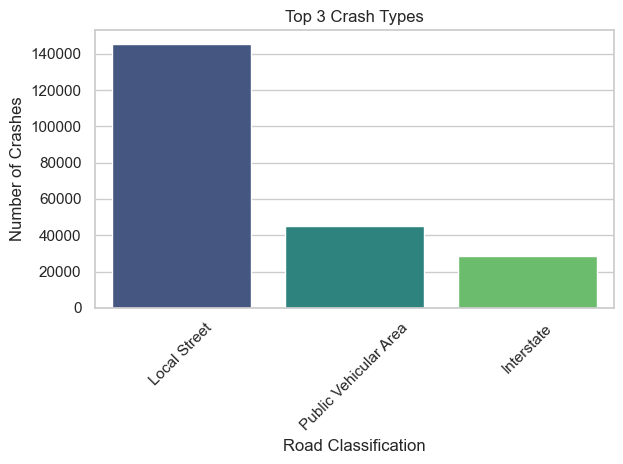

In [58]:
top_road = crash_df_subset['RoadClassification'].value_counts(dropna=False).nlargest(3).reset_index()
top_road.columns = ['RoadClassification', 'Count']

sns.barplot(data=top_road, x='RoadClassification', y='Count', palette='viridis')
plt.title('Top 3 Crash Types')
plt.xlabel('Road Classification')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What roads have the highest number of crashes in Raleigh?

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\4239326849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x="Crash Count", y="Road Name", palette="viridis")


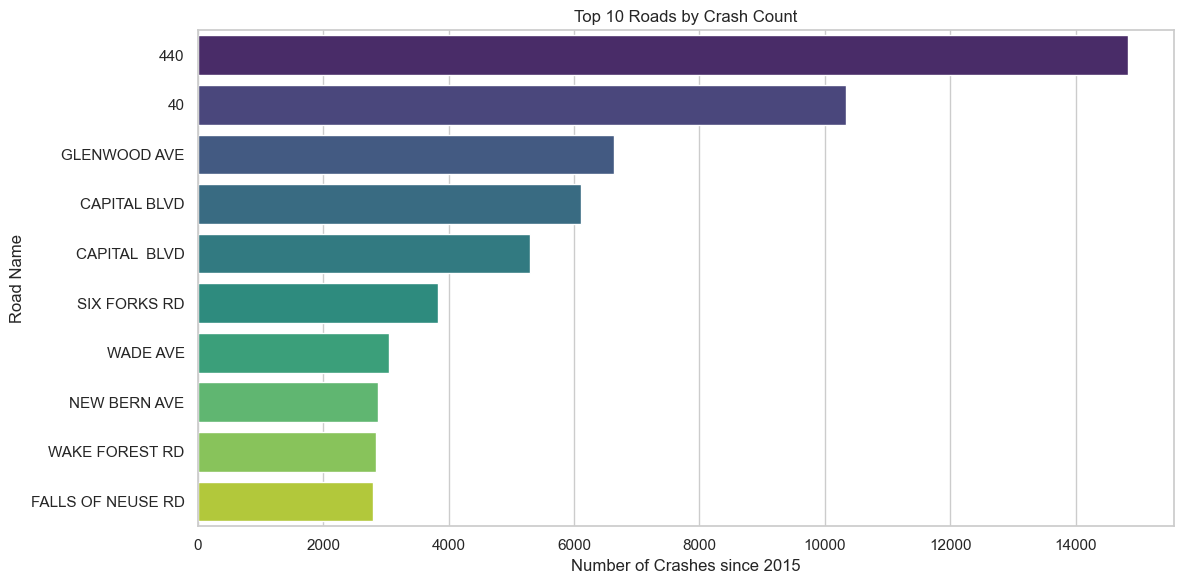

In [59]:
top_10_roads = crash_df_subset["LocationRoadNameOn"].value_counts().nlargest(10)


top_10_df = top_10_roads.reset_index()
top_10_df.columns = ["Road Name", "Crash Count"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_df, x="Crash Count", y="Road Name", palette="viridis")
plt.title("Top 10 Roads by Crash Count")
plt.xlabel("Number of Crashes since 2015")
plt.ylabel("Road Name")
plt.tight_layout()
plt.show()

## Geospatial Data Analysis:

### First, lets define the location/zone of the crash relative to downtown Raleigh as an estimate of the center-point of the city.

In [60]:
# Downtown Raleigh coordinates as reference points
center_lat = 35.787743
center_lon = -78.644257

# Function to determine direction from center
def get_direction(lat, lon, center_lat, center_lon):
    if pd.isna(lat) or pd.isna(lon):
        return "Unknown"
    
    lat_diff = lat - center_lat
    lon_diff = lon - center_lon

    if abs(lat_diff) < 0.001 and abs(lon_diff) < 0.001:
        return "Center"
    
    if lat_diff > 0 and lon_diff > 0:
        return "Northeast"
    elif lat_diff > 0 and lon_diff < 0:
        return "Northwest"
    elif lat_diff < 0 and lon_diff > 0:
        return "Southeast"
    elif lat_diff < 0 and lon_diff < 0:
        return "Southwest"
    elif lat_diff > 0:
        return "North"
    elif lat_diff < 0:
        return "South"
    elif lon_diff > 0:
        return "East"
    elif lon_diff < 0:
        return "West"
    else:
        return "Unknown"

# New column
crash_df_subset["Direction_From_Center"] = crash_df_subset.apply(
    lambda row: get_direction(row["LocationLatitude"], row["LocationLongitude"], center_lat, center_lon),
    axis=1
)


C:\Users\chase\AppData\Local\Temp\ipykernel_19124\4239419335.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_df_subset["Direction_From_Center"] = crash_df_subset.apply(


In [61]:
#crash_df_subset.head() 
# Direction_From_Center column is working as intended

crash_df_subset["Direction_From_Center"].value_counts()

Direction_From_Center
Northeast    94110
Northwest    61967
Southeast    42407
Southwest    34302
Center         254
Unknown          1
Name: count, dtype: int64

### Visualize the number of car crashes with a compass view relative to downtown Raleigh

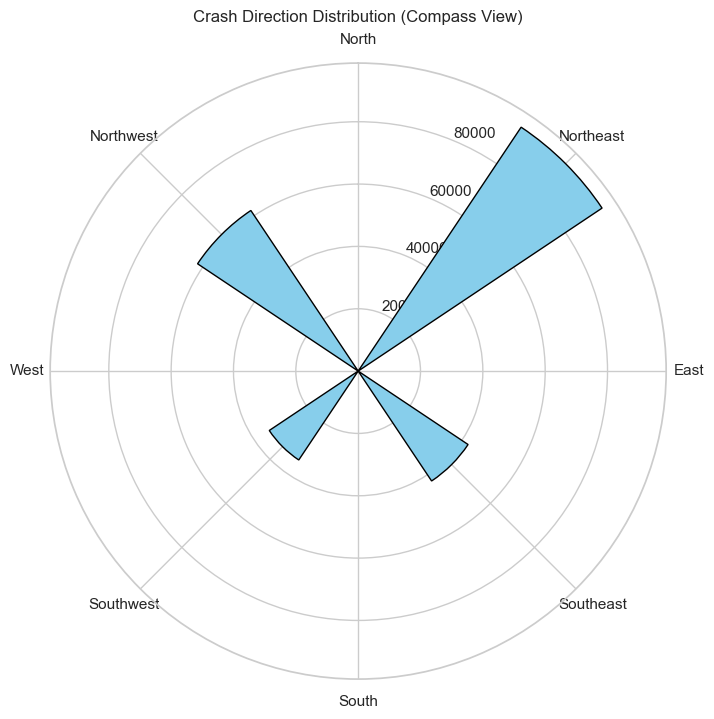

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate counts
direction_counts = crash_df_subset["Direction_From_Center"].value_counts()
directions = direction_counts.index
counts = direction_counts.values

# Map directions to angles (in degrees)
angle_map = {
    "North": 0, "Northeast": 45, "East": 90, "Southeast": 135,
    "South": 180, "Southwest": 225, "West": 270, "Northwest": 315
}
angles = [np.deg2rad(angle_map.get(d, 0)) for d in directions]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, counts, width=np.pi/8, color='skyblue', edgecolor='black')

# Set North to top (0 degrees)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)


ax.set_xticks([np.deg2rad(a) for a in angle_map.values()])
ax.set_xticklabels(angle_map.keys())

ax.set_title("Crash Direction Distribution (Compass View)", va='bottom')
plt.show()


#### Visualize/Characterize the types of car crashes

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\3495741626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_harmful, x='MostHarmfulEvent', y='Count', palette='viridis')


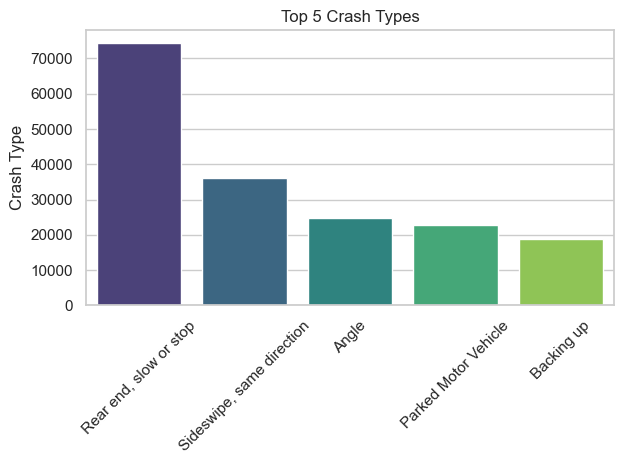

In [63]:
crash_df_subset['MostHarmfulEvent'].value_counts(dropna=False)

top_harmful = crash_df_subset['MostHarmfulEvent'].value_counts(dropna=False).nlargest(5).reset_index()
top_harmful.columns = ['MostHarmfulEvent', 'Count']

sns.barplot(data=top_harmful, x='MostHarmfulEvent', y='Count', palette='viridis')
plt.title('Top 5 Crash Types')
plt.xlabel('')
plt.ylabel('Crash Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Raleigh is becoming an increasingly popular place to live.

#### Are crashes happening at a higher rate?

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\1934455664.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=all_years, x='Crash_Date_Year', y='Count', palette='viridis')


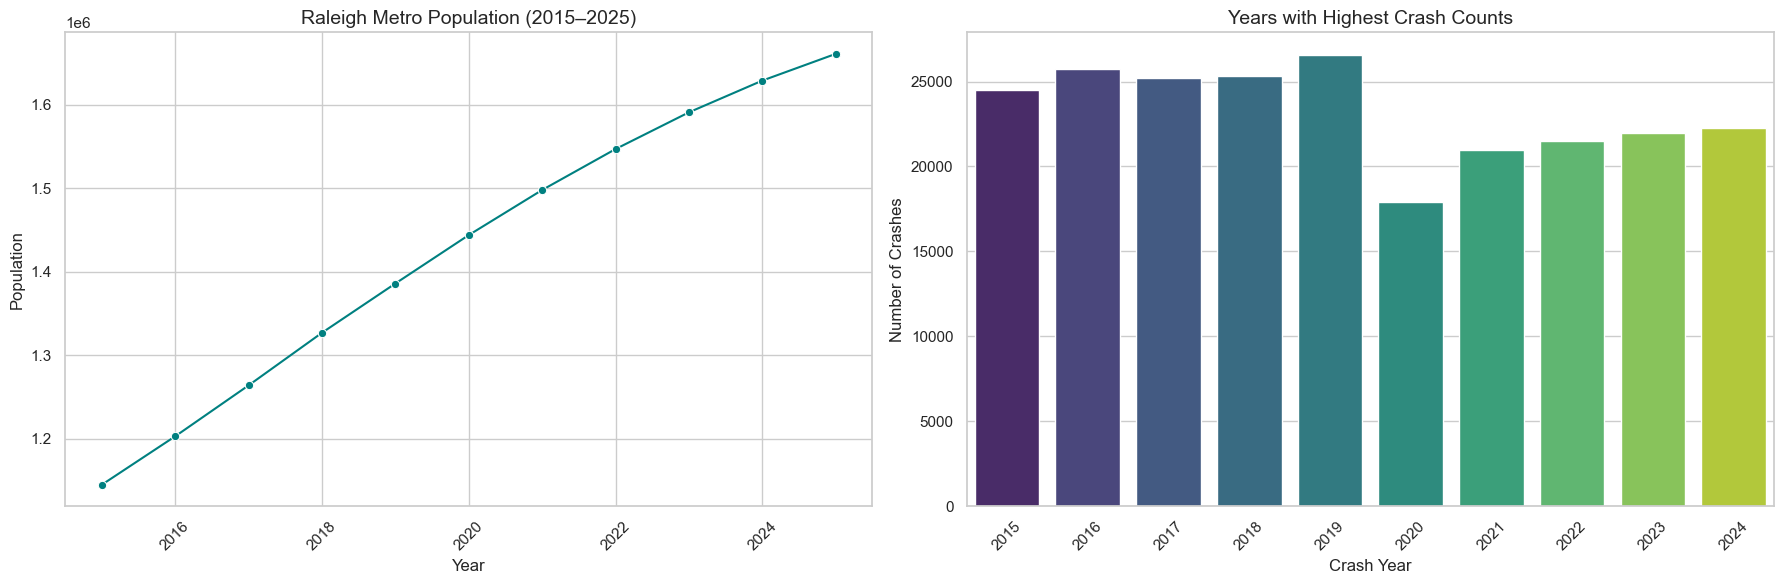

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raleigh Population Data  Source: https://www.macrotrends.net/global-metrics/cities/23110/raleigh/population
pop_data = {
    "Year": [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
    "Population": [1661000, 1629000, 1591000, 1547000, 1498000, 1444000, 
                   1386000, 1327000, 1264000, 1203000, 1145000]
}
Raleigh_10Year_pop = pd.DataFrame(pop_data)

all_years = crash_df_subset['Crash_Date_Year'].value_counts(dropna=False).nlargest(10).reset_index()
all_years.columns = ['Crash_Date_Year', 'Count']

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0], x="Year", y="Population", data=Raleigh_10Year_pop, marker="o", color="teal")
axes[0].set_title("Raleigh Metro Population (2015–2025)", fontsize=14)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Population", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], data=all_years, x='Crash_Date_Year', y='Count', palette='viridis')
axes[1].set_title("Years with Highest Crash Counts", fontsize=14)
axes[1].set_xlabel("Crash Year", fontsize=12)
axes[1].set_ylabel("Number of Crashes", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Crashes were highest between 2015 and 2019. 
#### This is likely reflecting pre-pandemic commuting patterns and an increase in WFH culture in Raleigh.


In [65]:
#pedestrians = crash_df_subset['pedestrians'].value_counts(dropna=False).nlargest(5).reset_index()
#pedestrians

### Lets create a new column to easily distinguish if a pedestrian was involved in the car crash (Yes/No)

### Use the Apply function with conditional logic

In [66]:
crash_df_subset["Pedestrian_Involved"] = crash_df_subset["pedestrians"].apply(
    lambda x: "Yes" if pd.notna(x) and x != 0 else "No"
)

crash_df_subset["Pedestrian_Involved"].value_counts()

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\3191071641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_df_subset["Pedestrian_Involved"] = crash_df_subset["pedestrians"].apply(


Pedestrian_Involved
No     230806
Yes      2235
Name: count, dtype: int64

### There is some missing/NA data present in the filtered df. However, this is column/context dependant. 

### Lets analyze the "killed" column to understand the data entry/reporting logic for future predictive modeling

In [67]:
crash_df_subset['killed'].value_counts(dropna=False)

killed
0.0    188951
NaN     43772
1.0       299
2.0        17
3.0         1
5.0         1
Name: count, dtype: int64

#### We can assume the values reflect how many passengers were killed for each car crash

#### Create a new column (with Unknown's included) for future Power BI visualization

In [68]:
crash_df_subset["Fatal"] = crash_df_subset["killed"].apply(
    lambda x: "No" if x == 0 else ("Unknown" if pd.isna(x) else "Yes")
)

crash_df_subset['Fatal'].value_counts(dropna=False)

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\826447195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_df_subset["Fatal"] = crash_df_subset["killed"].apply(


Fatal
No         188951
Unknown     43772
Yes           318
Name: count, dtype: int64

In [69]:
crash_df_subset.columns

Index(['DateOfCrash', 'LocationCity', 'LocationRoadNameOn',
       'FirstHarmfulEvent', 'MostHarmfulEvent', 'RoadClassification',
       'RoadFeature', 'TrafficControlType', 'WeatherCondition1',
       'WeatherCondition2', 'WeatherContributedToCrash', 'Crash_Date_Day',
       'Crash_Date_DOW', 'Crash_Date_DOW_Num', 'Crash_Date_Hour',
       'Crash_Date_Month', 'Crash_Date_Month_Num', 'Crash_Date_Year',
       'drivers', 'passengers', 'pedestrians', 'pedalcyclists', 'killed',
       'type_a_injury', 'type_b_injury', 'type_c_injury', 'no_injury',
       'injury_unknown', 'LocationLatitude', 'LocationLongitude',
       'Direction_From_Center', 'Pedestrian_Involved', 'Fatal'],
      dtype='object')

# Prediction (Classification and Time-series Analysis)

### For ease, let's create a new dataframe with columns/features likely to be used for predictive modeling:

In [70]:
columns_to_drop = [
    'LocationCity', 'FirstHarmfulEvent', 'TrafficControlType',
    'drivers', 'passengers', 'pedestrians', 'pedalcyclists',
    'type_a_injury', 'type_b_injury', 'type_c_injury', 'no_injury',
    'injury_unknown', 'LocationLatitude', 'LocationLongitude', 'killed'
]

prediction_df = crash_df_subset.drop(columns=columns_to_drop)

prediction_df.head()

,DateOfCrash,LocationRoadNameOn,MostHarmfulEvent,RoadClassification,RoadFeature,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,Direction_From_Center,Pedestrian_Involved,Fatal
0,2015/01/01 06:42:00+00,LYNN RD,Ran off road - right,Local Street,Four-way intersection,Clear,NaN,No,1,Thursday,5,1,January,1,2015,Northeast,No,No
1,2015/01/01 08:07:00+00,3955 NEW BERN AVE,"Rear end, slow or stop",Public Vehicular Area,No Special Feature,Clear,NaN,No,1,Thursday,5,3,January,1,2015,Northeast,No,No
2,2015/01/01 09:32:00+00,WALLINGFORD DR,Parked Motor Vehicle,Local Street,No Special Feature,Clear,NaN,No,1,Thursday,5,4,January,1,2015,Northeast,No,No
3,2015/01/01 07:23:00+00,440,Fixed object*,Interstate,No Special Feature,Clear,NaN,No,1,Thursday,5,2,January,1,2015,Northwest,No,No
4,2015/01/01 08:59:00+00,RAY RD,Fixed object*,Local Street,No Special Feature,Clear,NaN,No,1,Thursday,5,3,January,1,2015,Northwest,No,No


In [71]:
prediction_df["WeatherCondition1"].value_counts(dropna=False)
#prediction_df["WeatherCondition2"].value_counts(dropna=False)
#prediction_df["WeatherContributedToCrash"].value_counts(dropna=False)
prediction_df.columns

Index(['DateOfCrash', 'LocationRoadNameOn', 'MostHarmfulEvent',
       'RoadClassification', 'RoadFeature', 'WeatherCondition1',
       'WeatherCondition2', 'WeatherContributedToCrash', 'Crash_Date_Day',
       'Crash_Date_DOW', 'Crash_Date_DOW_Num', 'Crash_Date_Hour',
       'Crash_Date_Month', 'Crash_Date_Month_Num', 'Crash_Date_Year',
       'Direction_From_Center', 'Pedestrian_Involved', 'Fatal'],
      dtype='object')

## 1.Fatality Prediction using Logistic Regression, Random Forest, etc

In [72]:
predictors = ["Direction_From_Center",
"Crash_Date_Hour",
"Crash_Date_DOW",
"WeatherCondition1",
"RoadClassification",
"RoadFeature",
"WeatherContributedToCrash",
"Crash_Date_Month",
"MostHarmfulEvent"]

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression:

In [73]:

df_model = prediction_df[prediction_df["Fatal"].isin(["Yes", "No"])].copy()

features = [
    "Direction_From_Center",
    "Crash_Date_Hour",
    "Crash_Date_DOW",
    "WeatherCondition1",
    "RoadClassification",
    "RoadFeature",
    "WeatherContributedToCrash",
    "Crash_Date_Month",
    "MostHarmfulEvent"
]
X = df_model[features].copy()
y = df_model["Fatal"].map({"No": 0, "Yes": 1})  # Binary encoding

X["WeatherContributedToCrash"] = X["WeatherContributedToCrash"].map({"Yes": 1, "No": 0}).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

categorical_features = [
    "Direction_From_Center",
    "Crash_Date_DOW",
    "WeatherCondition1",
    "RoadClassification",
    "RoadFeature",
    "Crash_Date_Month",
    "MostHarmfulEvent"
]
numeric_features = ["Crash_Date_Hour"]
binary_features = ["WeatherContributedToCrash"]

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
binary_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features)
    ]
)

logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

logreg_pipeline.fit(X_train, y_train)

y_pred = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     37790
           1       0.01      0.75      0.02        64

    accuracy                           0.85     37854
   macro avg       0.50      0.80      0.47     37854
weighted avg       1.00      0.85      0.92     37854

[[32144  5646]
 [   16    48]]


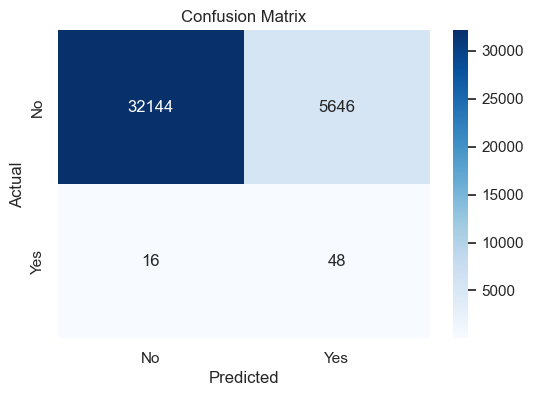

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = logreg_pipeline.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
labels = ["No", "Yes"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Extract coefficients to analyze feature importance for logistic regression:

In [75]:
import numpy as np


ohe = logreg_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_features)


all_features = np.concatenate([
    ohe_features,
    numeric_features,
    binary_features
])

# coefficients
coefficients = logreg_pipeline.named_steps["classifier"].coef_[0]

# Create df for ranking features
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefficients,
    "Abs_Coefficient": np.abs(coefficients)
}).sort_values(by="Abs_Coefficient", ascending=False)

# Display top features
print(feature_importance_df.head(30))

                                              Feature  Coefficient  \
73                        MostHarmfulEvent_Backing up    -5.949296   
85                        MostHarmfulEvent_Pedestrian     5.541147   
79                  MostHarmfulEvent_Moveable object*    -5.307122   
35                      RoadFeature_Driveway, private    -4.854159   
72                            MostHarmfulEvent_Animal    -4.757413   
90                    MostHarmfulEvent_Rear end, turn    -4.377834   
16                 WeatherCondition1_Fog, smog, smoke     4.118549   
20  WeatherCondition1_Sleet, hail, freezing rain/d...    -4.015383   
26                          RoadClassification_Other*    -3.923749   
30                        RoadClassification_US Route     3.679508   
40     RoadFeature_Merge lane between on and off ramp     3.651339   
54              RoadFeature_Traffic circle/roundabout    -3.566932   
75                           MostHarmfulEvent_Head on     3.376313   
84                  

These coefficient's seem to make sense:

Car "crashes" when backing up are less likely to be fatal (negative coefficient) -->  Feature: MostHarmfulEvent_Backing up (Coefficient: -5.949296)

Car crashes involving pedestrians are likely to be fatal (positive coefficient)-->  Feature: MostHarmfulEvent_Pedestrian (Coefficient: 5.541147)

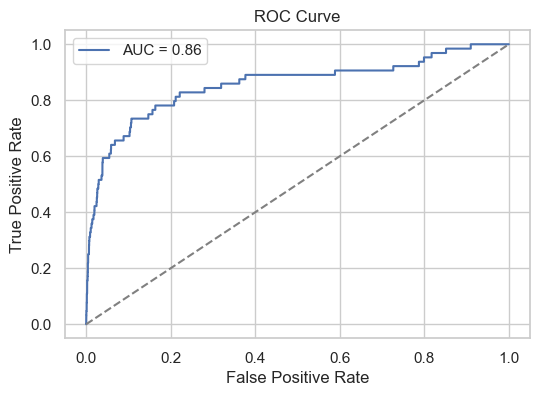

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score


y_probs = logreg_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


##### Logistic Regression Strengths:
1) High precision for class 0 ("No"): The model is extremely confident when it predicts "No" --> almost no false positives.

2) OK recall for class 1 ("Yes"): It correctly identifies 75% of actual fatalities.

##### Logistic Regression Weaknesses:
1) Very low precision for class 1 ("Yes"): Only 1% of predicted "Yes" cases are actually fatal --> lots of false alarms.

Major Consideration:
Class imbalance: Only 64 fatal cases vs. 37,790 non-fatal. That is a 1:590 ratio, which is brutal for logistic regression.

To improve the logistic regression model, we could balance the training set with SMOTE or undersampling methods 



## Random Forest Classification:

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [78]:

df_model = prediction_df[prediction_df["Fatal"].isin(["Yes", "No"])].copy()


features = [
    "Direction_From_Center",
    "Crash_Date_Hour",
    "Crash_Date_DOW",
    "WeatherCondition1",
    "RoadClassification",
    "RoadFeature",
    "WeatherContributedToCrash",
    "Crash_Date_Month",
    "MostHarmfulEvent"
]
X = df_model[features].copy()
y = df_model["Fatal"].map({"No": 0, "Yes": 1}) 

# Fix binary column
X["WeatherContributedToCrash"] = X["WeatherContributedToCrash"].map({"Yes": 1, "No": 0}).fillna(0)

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

categorical_features = [
    "Direction_From_Center",
    "Crash_Date_DOW",
    "WeatherCondition1",
    "RoadClassification",
    "RoadFeature",
    "Crash_Date_Month",
    "MostHarmfulEvent"
]
numeric_features = ["Crash_Date_Hour"]
binary_features = ["WeatherContributedToCrash"]

# RF transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
binary_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features)
    ]
)


rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37790
           1       0.00      0.00      0.00        64

    accuracy                           1.00     37854
   macro avg       0.50      0.50      0.50     37854
weighted avg       1.00      1.00      1.00     37854

[[37774    16]
 [   64     0]]


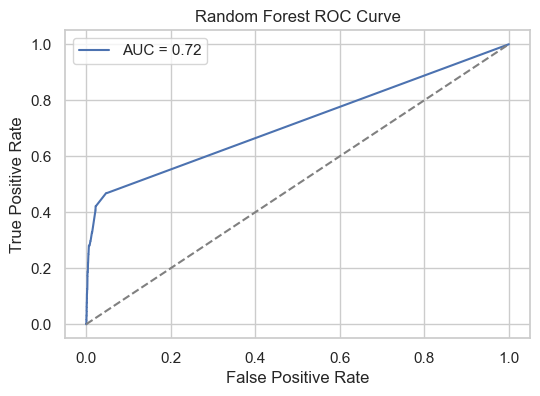

In [79]:

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_probs = rf_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

#### AUC was much lower than expected. 

#### Lets update the RF model with GridSearchCV for hyperparameter tuning and CalibratedClassifierCV for better AUC score

### Code for GridSearchCV --> Comment out in future iterations to save time!

In [80]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split


# df_model = prediction_df[prediction_df["Fatal"].isin(["Yes", "No"])].copy()
# features = [
#     "Direction_From_Center", "Crash_Date_Hour", "Crash_Date_DOW",
#     "WeatherCondition1", "RoadClassification", "RoadFeature",
#     "WeatherContributedToCrash", "Crash_Date_Month", "MostHarmfulEvent"
# ]
# X = df_model[features].copy()
# y = df_model["Fatal"].map({"No": 0, "Yes": 1})
# X["WeatherContributedToCrash"] = X["WeatherContributedToCrash"].map({"Yes": 1, "No": 0}).fillna(0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# categorical_features = [
#     "Direction_From_Center", "Crash_Date_DOW", "WeatherCondition1",
#     "RoadClassification", "RoadFeature", "Crash_Date_Month", "MostHarmfulEvent"
# ]
# numeric_features = ["Crash_Date_Hour"]
# binary_features = ["WeatherContributedToCrash"]

# categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# numeric_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])
# binary_transformer = SimpleImputer(strategy="most_frequent")

# preprocessor = ColumnTransformer([
#     ("cat", categorical_transformer, categorical_features),
#     ("num", numeric_transformer, numeric_features),
#     ("bin", binary_transformer, binary_features)
# ])


# rf_pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
# ])

# # GridSearch parameters
# param_grid = {
#     "classifier__n_estimators": [100, 200],
#     "classifier__max_depth": [5, 10, None],
#     "classifier__min_samples_leaf": [1, 5, 10],
#     "classifier__max_features": ["sqrt", "log2"]
# }

# grid_search = GridSearchCV(
#     rf_pipeline,
#     param_grid,
#     cv=5,
#     scoring="roc_auc",
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)


Re-run RF with the best parameters from GridSearchCV

Best parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 200}

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


df_model = prediction_df[prediction_df["Fatal"].isin(["Yes", "No"])].copy()
features = [
    "Direction_From_Center", "Crash_Date_Hour", "Crash_Date_DOW",
    "WeatherCondition1", "RoadClassification", "RoadFeature",
    "WeatherContributedToCrash", "Crash_Date_Month", "MostHarmfulEvent"
]
X = df_model[features].copy()
y = df_model["Fatal"].map({"No": 0, "Yes": 1})
X["WeatherContributedToCrash"] = X["WeatherContributedToCrash"].map({"Yes": 1, "No": 0}).fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


categorical_features = [
    "Direction_From_Center", "Crash_Date_DOW", "WeatherCondition1",
    "RoadClassification", "RoadFeature", "Crash_Date_Month", "MostHarmfulEvent"
]
numeric_features = ["Crash_Date_Hour"]
binary_features = ["WeatherContributedToCrash"]

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
binary_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("cat", categorical_transformer, categorical_features),
    ("num", numeric_transformer, numeric_features),
    ("bin", binary_transformer, binary_features)
])

# Use best RF params directly
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    max_features="log2",
    class_weight="balanced",
    random_state=42
)


calibrated_rf = CalibratedClassifierCV(best_rf, method="sigmoid", cv=5)


final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", calibrated_rf)
])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37790
           1       0.00      0.00      0.00        64

    accuracy                           1.00     37854
   macro avg       0.50      0.50      0.50     37854
weighted avg       1.00      1.00      1.00     37854

[[37790     0]
 [   64     0]]
AUC: 0.8783896202699127


c:\Users\chase\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chase\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chase\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


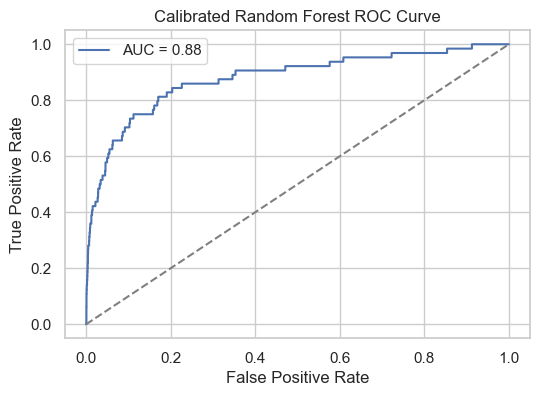

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


final_pipeline.fit(X_train, y_train)


y_pred = final_pipeline.predict(X_test)
y_probs = final_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_probs))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Calibrated Random Forest ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Much Better! What are the most important features in this RF model?

In [83]:
# Access fitted RFs from each fold
rf_estimators = [
    clf.estimator for clf in final_pipeline.named_steps["classifier"].calibrated_classifiers_
]


feature_names = final_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Average the feature importances
importances = np.mean([rf.feature_importances_ for rf in rf_estimators], axis=0)


feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


C:\Users\chase\AppData\Local\Temp\ipykernel_19124\1935789778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df.head(top_n), palette="crest")


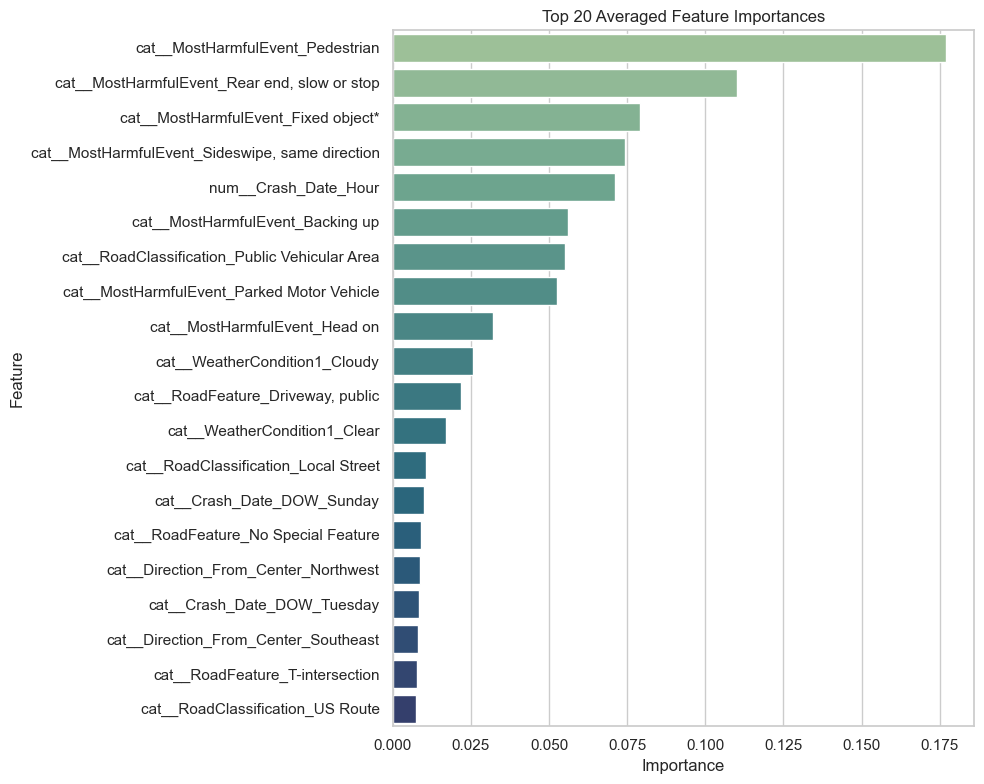

In [84]:
# Plot top 20
top_n = 20
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(top_n), palette="crest")
plt.title(f"Top {top_n} Averaged Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [85]:
prediction_df.head()

,DateOfCrash,LocationRoadNameOn,MostHarmfulEvent,RoadClassification,RoadFeature,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,Direction_From_Center,Pedestrian_Involved,Fatal
0,2015/01/01 06:42:00+00,LYNN RD,Ran off road - right,Local Street,Four-way intersection,Clear,NaN,No,1,Thursday,5,1,January,1,2015,Northeast,No,No
1,2015/01/01 08:07:00+00,3955 NEW BERN AVE,"Rear end, slow or stop",Public Vehicular Area,No Special Feature,Clear,NaN,No,1,Thursday,5,3,January,1,2015,Northeast,No,No
2,2015/01/01 09:32:00+00,WALLINGFORD DR,Parked Motor Vehicle,Local Street,No Special Feature,Clear,NaN,No,1,Thursday,5,4,January,1,2015,Northeast,No,No
3,2015/01/01 07:23:00+00,440,Fixed object*,Interstate,No Special Feature,Clear,NaN,No,1,Thursday,5,2,January,1,2015,Northwest,No,No
4,2015/01/01 08:59:00+00,RAY RD,Fixed object*,Local Street,No Special Feature,Clear,NaN,No,1,Thursday,5,3,January,1,2015,Northwest,No,No


### Let's add Recursive Feature Elimination (RFE) with the best_params from GridSearchCV 
Best parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 200}
#### Goal:
1) Improve generalizability
2) Remove redundant features

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


df_model = prediction_df[prediction_df["Fatal"].isin(["Yes", "No"])].copy()
features = [
    "Direction_From_Center", "Crash_Date_Hour", "Crash_Date_DOW",
    "WeatherCondition1", "RoadClassification", "RoadFeature",
    "WeatherContributedToCrash", "Crash_Date_Month", "MostHarmfulEvent"
]
X = df_model[features].copy()
y = df_model["Fatal"].map({"No": 0, "Yes": 1})
X["WeatherContributedToCrash"] = X["WeatherContributedToCrash"].map({"Yes": 1, "No": 0}).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


categorical_features = [
    "Direction_From_Center", "Crash_Date_DOW", "WeatherCondition1",
    "RoadClassification", "RoadFeature", "Crash_Date_Month", "MostHarmfulEvent"
]
numeric_features = ["Crash_Date_Hour"]
binary_features = ["WeatherContributedToCrash"]

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
binary_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("cat", categorical_transformer, categorical_features),
    ("num", numeric_transformer, numeric_features),
    ("bin", binary_transformer, binary_features)
])


best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    max_features="log2",
    class_weight="balanced",
    random_state=42
)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Recursive Feature Elimination Cross-Validation (RFECV)
cv_strategy = StratifiedKFold(n_splits=3)
rfecv = RFECV(
    estimator=best_rf,
    step=1,
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1
)
rfecv.fit(X_train_transformed, y_train)


y_pred = rfecv.predict(X_test_transformed)
y_proba = rfecv.predict_proba(X_test_transformed)[:, 1]

print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





AUC Score: 0.8748763727176501
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     37790
           1       0.01      0.72      0.02        64

    accuracy                           0.88     37854
   macro avg       0.50      0.80      0.48     37854
weighted avg       1.00      0.88      0.94     37854

Confusion Matrix:
 [[33346  4444]
 [   18    46]]


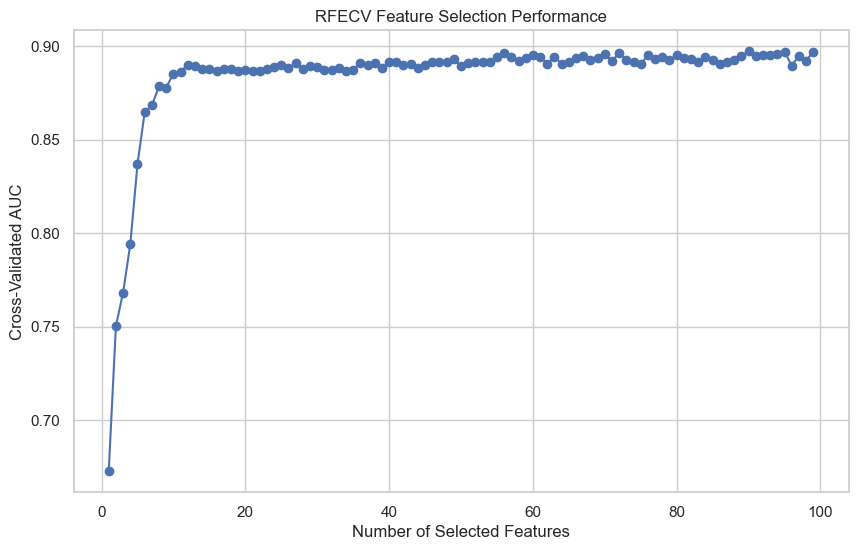

Selected Features by RFECV:
 ['cat__Direction_From_Center_Northeast'
 'cat__Direction_From_Center_Northwest'
 'cat__Direction_From_Center_Southeast'
 'cat__Direction_From_Center_Southwest'
 'cat__Direction_From_Center_Unknown' 'cat__Crash_Date_DOW_Friday'
 'cat__Crash_Date_DOW_Monday' 'cat__Crash_Date_DOW_Saturday'
 'cat__Crash_Date_DOW_Sunday' 'cat__Crash_Date_DOW_Thursday'
 'cat__Crash_Date_DOW_Tuesday' 'cat__Crash_Date_DOW_Wednesday'
 'cat__WeatherCondition1_Clear' 'cat__WeatherCondition1_Cloudy'
 'cat__WeatherCondition1_Fog, smog, smoke' 'cat__WeatherCondition1_Other*'
 'cat__WeatherCondition1_Rain'
 'cat__WeatherCondition1_Sleet, hail, freezing rain/drizzle'
 'cat__WeatherCondition1_Snow' 'cat__WeatherCondition1_nan'
 'cat__RoadClassification_Interstate'
 'cat__RoadClassification_Local Street' 'cat__RoadClassification_NC Route'
 'cat__RoadClassification_Other*'
 'cat__RoadClassification_Private Road, Driveway'
 'cat__RoadClassification_Public Vehicular Area'
 'cat__RoadClassificat

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("Cross-Validated AUC")
plt.title("RFECV Feature Selection Performance")
plt.grid(True)
plt.show()


feature_names = preprocessor.get_feature_names_out()
selected_features = feature_names[rfecv.support_]
print("Selected Features by RFECV:\n", selected_features)

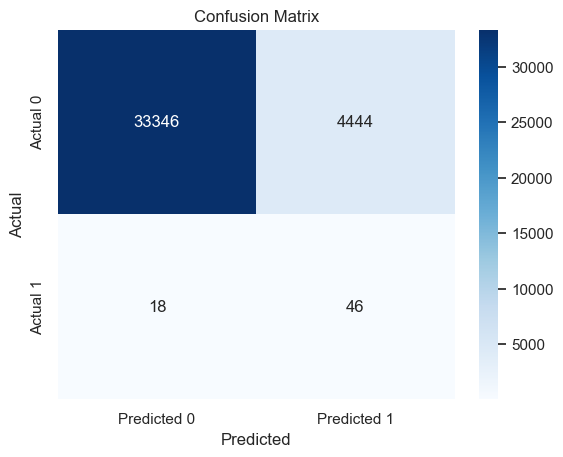

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Similar performance with less features

AUC Score: 0.8748763727176501

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.88      0.94     37790
           1       0.01      0.72      0.02        64

    accuracy                           0.88     37854
    
   macro avg       0.50      0.80      0.48     37854

weighted avg       1.00      0.88      0.94     37854

Confusion Matrix:
 [[33346  4444]
 [   18    46]]

# Time-series analysis 
### Raleigh car crashes from 2015 to 2024

In [89]:
crash_df.head()

#crash_df.DateOfCrash.dtype

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationRoadNameOn,LocationRampIndicator,LocationFeetFromRoad,LocationMilesFromRoad,LocationDirectionFromRoad,LocationAtFromIndicator,LocationRoadNameAt,LocationDirectionToRoad,LocationRoadNameTo,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,UpdateDate,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude
0,-8.753864e+06,4.282020e+06,1,121838,2015/01/01 06:42:00+00,P15000024,On Roadway (Surface) / Off Roadway,In,RALEIGH,LYNN RD,No,5.0,NaN,E,From,SIX FORKS RD,E,SANDY FORKS RD,Ran off road - right,Ran off road - right,Local Street,Four-way intersection,Stop and go signal,Clear,NaN,No,2015/01/02 17:40:00.610+00,1,Thursday,5,1,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.8647,-78.6373
1,-8.746306e+06,4.273095e+06,2,121840,2015/01/01 08:07:00+00,P15000038,Outside Trafficway,In,RALEIGH,3955 NEW BERN AVE,No,100.0,NaN,N,From,NEW BERN AVE,N,BEACON VILLAGE DR,"Rear end, slow or stop","Rear end, slow or stop",Public Vehicular Area,No Special Feature,No control present,Clear,NaN,No,2015/01/02 17:40:01.050+00,1,Thursday,5,3,January,1,2015,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.7997,-78.5694
2,-8.746473e+06,4.280097e+06,3,121843,2015/01/01 09:32:00+00,P15000054,On Roadway (Surface) / Off Roadway,In,RALEIGH,WALLINGFORD DR,No,500.0,NaN,E,From,PENCE CT,E,KRESSON PL,Parked Motor Vehicle,Parked Motor Vehicle,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 17:40:00.630+00,1,Thursday,5,4,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8507,-78.5709
3,-8.760165e+06,4.274482e+06,4,121848,2015/01/01 07:23:00+00,P15000030,On Roadway (Surface) / Off Roadway,In,RALEIGH,440,Yes,25.0,NaN,E,From,440,E,440,Other non-collision*,Fixed object*,Interstate,No Special Feature,No control present,Clear,NaN,No,2015/01/23 21:40:00.040+00,1,Thursday,5,2,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8098,-78.6939
4,-8.760399e+06,4.285427e+06,5,121850,2015/01/01 08:59:00+00,P15000055,On Roadway (Surface) / Off Roadway,In,RALEIGH,RAY RD,No,50.0,NaN,NW,From,KNEBWORTH CT,NW,BROAD ST,Ran off road - right,Fixed object*,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 17:20:00.160+00,1,Thursday,5,3,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8895,-78.6960


In [90]:
# Convert to datetime
crash_df["DateOfCrash"] = pd.to_datetime(crash_df["DateOfCrash"], errors="coerce")

# Extract the daily crash counts
daily_counts = crash_df.groupby(crash_df["DateOfCrash"].dt.date).size().reset_index(name="Crash_Count")
daily_counts["Crash_Day"] = pd.to_datetime(daily_counts["DateOfCrash"])
daily_counts.set_index("Crash_Day", inplace=True)

# New df
time_df = pd.DataFrame(index=daily_counts.index)

time_df["Crash_Count"] = daily_counts["Crash_Count"]


time_df["Crash_Date_Day"] = time_df.index.day
time_df["Crash_Date_DOW"] = time_df.index.day_name()
time_df["Crash_Date_DOW_Num"] = time_df.index.dayofweek
time_df["Crash_Date_Hour"] = 0  
time_df["Crash_Date_Month"] = time_df.index.month_name()
time_df["Crash_Date_Month_Num"] = time_df.index.month
time_df["Crash_Date_Year"] = time_df.index.year


In [91]:
time_df.head(10)

,Crash_Count,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year
Crash_Day,,,,,,,,
2011-05-30,1,30,Monday,0,0,May,5,2011
2011-08-12,1,12,Friday,4,0,August,8,2011
2011-08-20,2,20,Saturday,5,0,August,8,2011
2012-03-09,1,9,Friday,4,0,March,3,2012
2012-06-16,1,16,Saturday,5,0,June,6,2012
2012-07-26,1,26,Thursday,3,0,July,7,2012
2013-06-30,1,30,Sunday,6,0,June,6,2013
2013-07-04,1,4,Thursday,3,0,July,7,2013
2013-09-30,1,30,Monday,0,0,September,9,2013


This is sorted by date (as intended) but still contains dates prior to 1/1/2015 that need to be dropped

In [92]:
time_df = time_df[time_df.index >= "2015-01-01"]

time_df.head()

,Crash_Count,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year
Crash_Day,,,,,,,,
2015-01-01,31,1,Thursday,3,0,January,1,2015
2015-01-02,41,2,Friday,4,0,January,1,2015
2015-01-03,52,3,Saturday,5,0,January,1,2015
2015-01-04,48,4,Sunday,6,0,January,1,2015
2015-01-05,73,5,Monday,0,0,January,1,2015


Perfect! Save to a new csv for Power BI

In [93]:
time_df.to_csv("crash_datetime.csv")

In [94]:
time_df.tail()

,Crash_Count,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year
Crash_Day,,,,,,,,
2025-01-20,26,20,Monday,0,0,January,1,2025
2025-01-21,49,21,Tuesday,1,0,January,1,2025
2025-01-22,27,22,Wednesday,2,0,January,1,2025
2025-01-23,23,23,Thursday,3,0,January,1,2025
2025-01-24,3,24,Friday,4,0,January,1,2025


C:\Users\chase\AppData\Local\Temp\ipykernel_19124\460355584.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  crashes_by_year = time_df.loc["2015":"2024"].resample("Y").Crash_Count.sum()


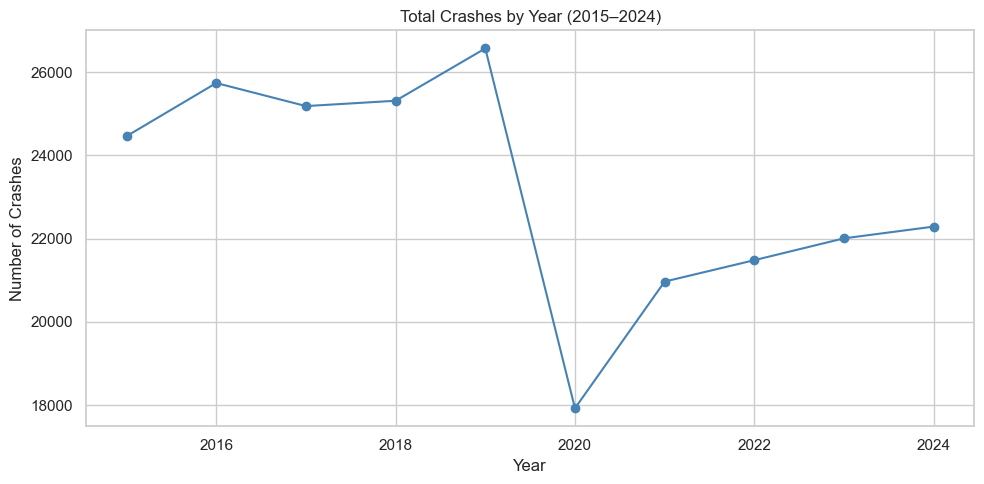

In [95]:
# Resample by year and use the sum of the Crash_Count column
crashes_by_year = time_df.loc["2015":"2024"].resample("Y").Crash_Count.sum()

plt.figure(figsize=(10, 5))
crashes_by_year.index = crashes_by_year.index.year  
crashes_by_year.plot(kind="line", marker="o", color="steelblue")
plt.title("Total Crashes by Year (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()


Crashes by Month 

C:\Users\chase\AppData\Local\Temp\ipykernel_19124\3751864766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crashes = monthly_df["Crash_Count"].resample("M").sum()


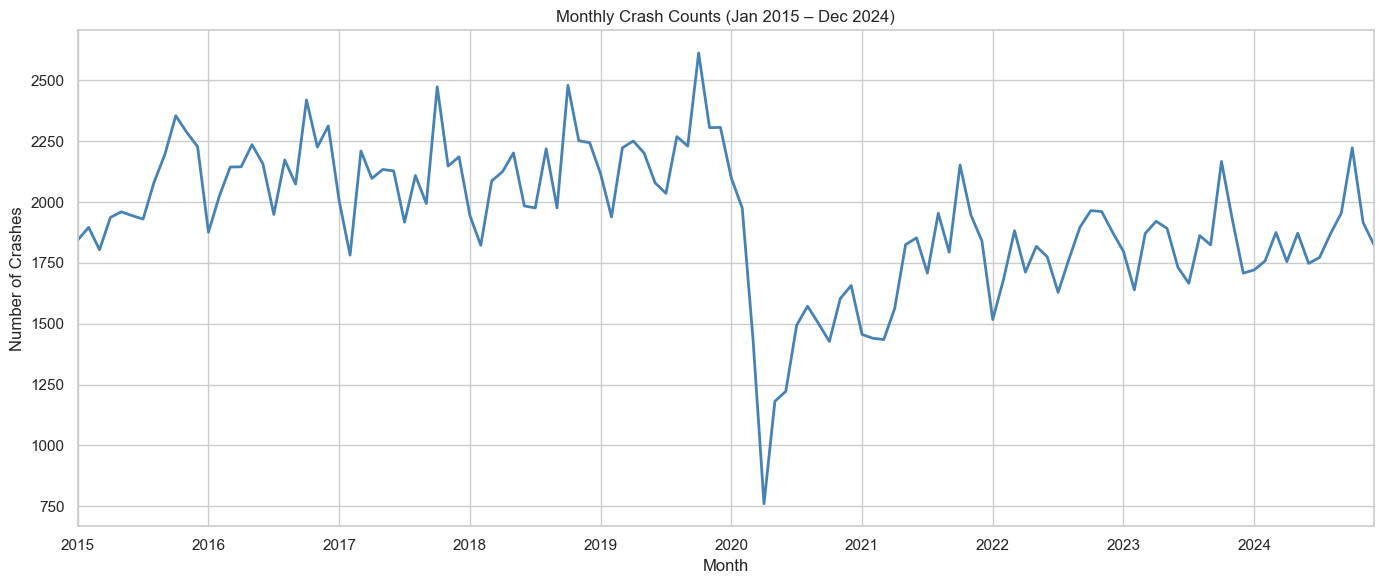

In [96]:
monthly_df = time_df.loc["2015-01":"2024-12"]

# Resample by month and use the sum of crash counts for the plot
monthly_crashes = monthly_df["Crash_Count"].resample("M").sum()

plt.figure(figsize=(14, 6))
monthly_crashes.plot(color="steelblue", linewidth=2)
plt.title("Monthly Crash Counts (Jan 2015 – Dec 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()


### XGBoost vs. Seasonal ARIMA (SARIMA) for prediction:
Goal: Predict crashes for each month in 2025

#### XGBoost may handle the sharp decline in crashes (due to COVID-19) better than SARIMA with complex non-linear pattern recognition

#### SARIMA may perform better with seasonal patterns 

In [ ]:
# df = time_df[(time_df.index >= "2015-01-01") & (time_df.index < "2025-01-01")]
# df = df.resample("M").sum() 
# df["Year"] = df.index.year
# df["Month"] = df.index.month
# df["Month_Sin"] = np.sin(2 * np.pi * df["Month"] / 12)
# df["Month_Cos"] = np.cos(2 * np.pi * df["Month"] / 12)
# df["Post_COVID"] = (df.index >= "2020-03").astype(int)
# df["Years_Since_2015"] = df["Year"] - 2015


C:\Users\chase\AppData\Local\Temp\ipykernel_19124\3489911191.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").sum()


In [106]:
df.columns

Index(['Crash_Count', 'Crash_Date_Day', 'Crash_Date_DOW', 'Crash_Date_DOW_Num',
       'Crash_Date_Hour', 'Crash_Date_Month', 'Crash_Date_Month_Num',
       'Crash_Date_Year', 'Year', 'Month', 'Month_Sin', 'Month_Cos',
       'Post_COVID', 'Years_Since_2015'],
      dtype='object')

## XGBoost forecast of 2025 monthly car crashes with Lag features 

#### Lag features --> learn from recent crash patterns



### Train XGBoost and Predict:

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


df = time_df[(time_df.index >= "2015-01-01") & (time_df.index < "2025-01-01")]
df = df.resample("MS").sum()  


In [120]:

df["Crash_Date_DOW"] = df.index.dayofweek
df["Crash_Date_Month"] = df.index.month


df["Lag_1"] = df["Crash_Count"].shift(1)
df["Lag_2"] = df["Crash_Count"].shift(2)
df["Lag_3"] = df["Crash_Count"].shift(3)

df = df.dropna()


Ordinal encoding for month and weekday to preserve temporal order

In [121]:
X_train = df.drop(columns=["Crash_Count"])
y_train = df["Crash_Count"]

oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[["Crash_Date_DOW", "Crash_Date_Month"]] = oe.fit_transform(
    X_train[["Crash_Date_DOW", "Crash_Date_Month"]]
)


In [122]:
# Create Future Dates for prediction
future_dates = pd.date_range(start="2025-01-01", end="2025-12-01", freq="MS")


X_2025 = pd.DataFrame({
    "Crash_Date_DOW": future_dates.dayofweek,
    "Crash_Date_Month": future_dates.month,
}, index=future_dates)


last_known = df["Crash_Count"].copy()

for i in range(1, 4):
    X_2025[f"Lag_{i}"] = last_known.shift(i).iloc[-1]


X_2025[["Crash_Date_DOW", "Crash_Date_Month"]] = oe.transform(
    X_2025[["Crash_Date_DOW", "Crash_Date_Month"]]
)


#### Fit XGBoost

In [123]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

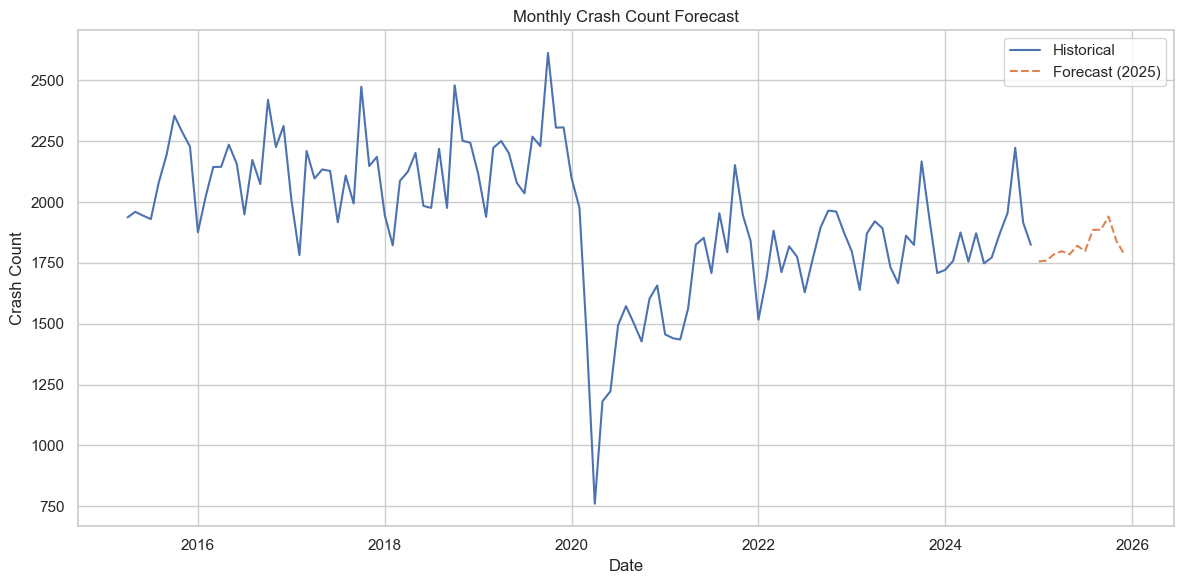

In [124]:
X_2025 = X_2025.reindex(columns=X_train.columns, fill_value=0)
y_pred_2025 = model.predict(X_2025)


plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Crash_Count"], label="Historical")
plt.plot(X_2025.index, y_pred_2025, label="Forecast (2025)", linestyle="--")
plt.title("Monthly Crash Count Forecast")
plt.xlabel("Date")
plt.ylabel("Crash Count")
plt.legend()
plt.tight_layout()
plt.show()


### Zoomed in with data labels

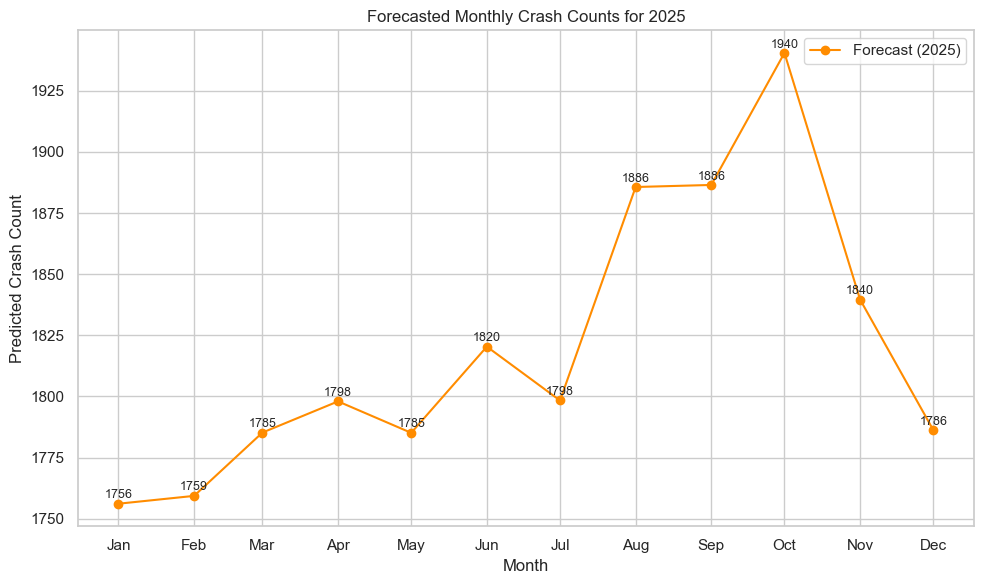

In [117]:

plt.figure(figsize=(10, 6))
plt.plot(X_2025.index, y_pred_2025, marker="o", linestyle="-", color="darkorange", label="Forecast (2025)")

# Data labels
for date, value in zip(X_2025.index, y_pred_2025):
    plt.text(date, value + 1, f"{value:.0f}", ha="center", va="bottom", fontsize=9)


month_labels = X_2025.index.strftime("%b")  # Short month names
plt.xticks(ticks=X_2025.index, labels=month_labels, rotation=0)

plt.title("Forecasted Monthly Crash Counts for 2025")
plt.xlabel("Month")
plt.ylabel("Predicted Crash Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### SARIMA


In [126]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# Fit SARIMA model
sarima_model = auto_arima(
    df["Crash_Count"],
    seasonal=True,
    m=12,  
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

# Forecasting 12 months ahead for 2025
sarima_forecast = sarima_model.predict(n_periods=12)


future_dates = pd.date_range(start="2025-01-01", periods=12, freq="MS")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1566.214, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1547.456, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1553.004, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1564.217, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1561.874, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1542.438, Time=0.57 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1541.920, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1548.465, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1542.111, Time=0.38 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=i

#### Plot with dates in 6M intervals on x-axis

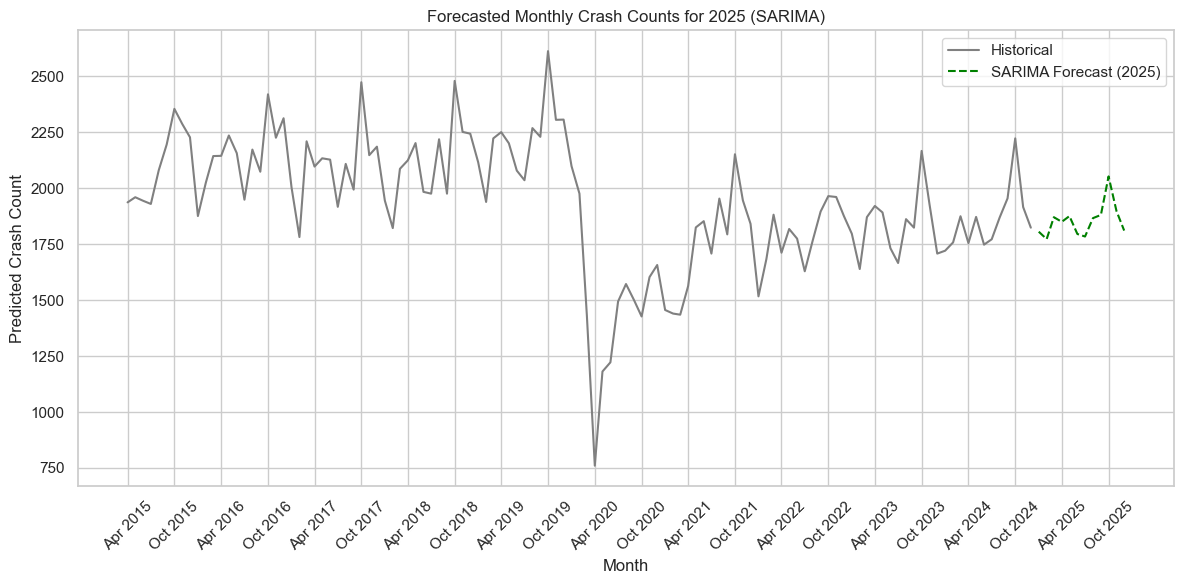

In [132]:
import matplotlib.pyplot as plt
import pandas as pd


all_dates = pd.concat([df.index.to_series(), pd.Series(future_dates)])
all_dates = pd.to_datetime(all_dates)


tick_spacing = pd.date_range(start=all_dates.min(), end=all_dates.max(), freq="6MS")


tick_labels = tick_spacing.strftime("%b %Y")

plt.figure(figsize=(12, 6))


plt.plot(df.index, df["Crash_Count"], label="Historical", color="gray")

# plot for the SARIMA forecasted crashes
plt.plot(
    future_dates,
    sarima_forecast,
    linestyle="--",
    color="green",
    label="SARIMA Forecast (2025)"
)


plt.xticks(ticks=tick_spacing, labels=tick_labels, rotation=45)

plt.title("Forecasted Monthly Crash Counts for 2025 (SARIMA)")
plt.xlabel("Month")
plt.ylabel("Predicted Crash Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Zoomed in view of forecasted crashes

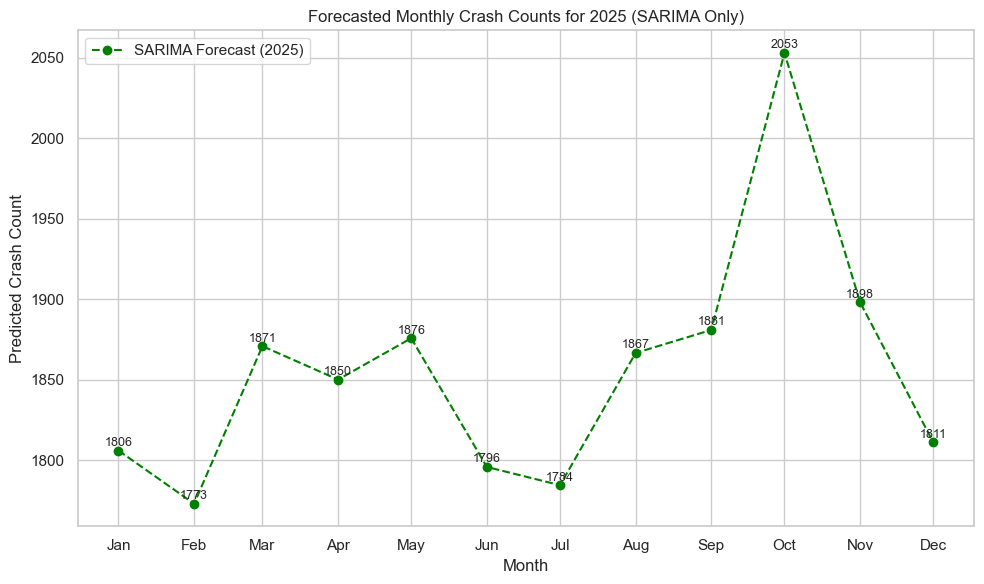

In [133]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(
    future_dates,
    sarima_forecast,
    marker="o",
    linestyle="--",
    color="green",
    label="SARIMA Forecast (2025)"
)

# Data labels 
for date, value in zip(future_dates, sarima_forecast):
    plt.text(date, value + 1, f"{value:.0f}", ha="center", va="bottom", fontsize=9)


month_labels = future_dates.strftime("%b")
plt.xticks(ticks=future_dates, labels=month_labels, rotation=0)


plt.title("Forecasted Monthly Crash Counts for 2025 (SARIMA Only)")
plt.xlabel("Month")
plt.ylabel("Predicted Crash Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
